## Load saved results for visualization

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

datasets = ['cora', 'flickr', 'reddit2', 'arxiv']
models = ['GCN', 'SAGE', 'MLP']
criterion = 'wrong2correct'
ROOT = '/home/grads/z/zhimengj/Code/edit_gnn/finetune'

In [3]:
def plot_hyper(summary, summary_GD, hyper_Diffs, models, dataset='cora'):
    fig = plt.figure()

    edit_way = 'ind_edit'
    metric = 'val_drawdown'

    gathered_data = []
    # model = 'GCN'
    for idx, model in enumerate(models):    
        data = [summary[dataset][model][hyper_Diff][edit_way][metric] for hyper_Diff in hyper_Diffs]
        gathered_data.append(data)

    gathered_GD_data = []
    for idx, model in enumerate(models):    
        data = summary_GD[dataset][model][edit_way][metric]
        gathered_GD_data.append(data)

    
    title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
    for i in range(len(models)):
        plt.plot(hyper_Diffs, gathered_data[i], color=f'C{i}', label=models[i], marker='*')
        plt.axhline(y=gathered_GD_data[i], color=f'C{i}', label='GD_' + models[i], linestyle='--')

    plt.ylabel(f'{metric} (%)')
    plt.xlabel(f'{title_mapping[edit_way]}')
    plt.grid()
    plt.legend()

In [4]:
def plot_2hyper(summary, hyper_Diffs, gammas, model='GCN', dataset='cora'):
    edit_way = 'ind_edit'
    metric = 'val_drawdown'
    title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}

    gathered_data = []
    # model = 'GCN'
    for idx, hyper_Diff in enumerate(hyper_Diffs):    
        data = [summary[dataset][model][hyper_Diff][gamma][edit_way][metric] for gamma in gammas]
        gathered_data.append(data)

    gathered_data = np.array(gathered_data)
    fig, ax = plt.subplots()
    im = ax.imshow(gathered_data)

    # # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(hyper_Diffs)))
    ax.set_xticklabels(gammas)
    ax.set_yticklabels(hyper_Diffs)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(hyper_Diffs)):
        for j in range(len(gammas)):
            text = ax.text(j, i, round(gathered_data[i, j], 1),
                        ha="center", va="center", color="w")

    ax.set_title(f"{model}_{dataset}")
    fig.tight_layout()
    plt.show()
    # ax.legend(models)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


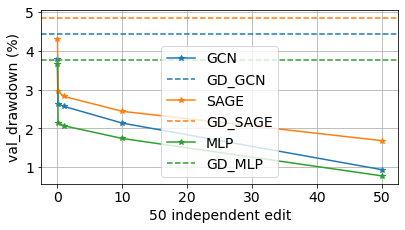

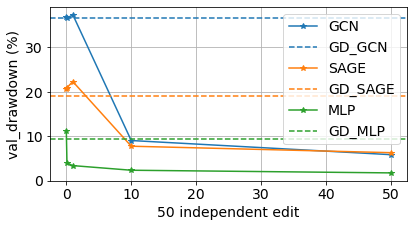

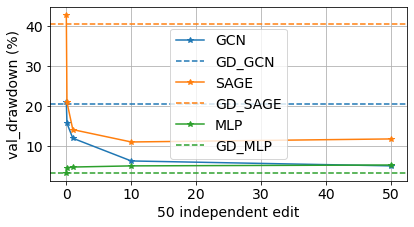

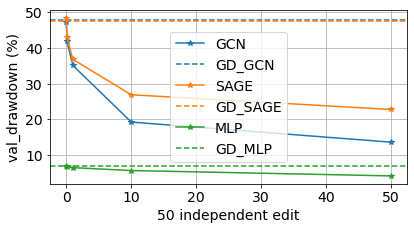

In [5]:
manner = 'GD_Diff'
hyper_Diffs = [0., 0.1, 1.0, 10.0, 50.0]
summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        summary[dataset][model] = {}
        for hyper_Diff in hyper_Diffs:
            file_name = f'{ROOT}/{dataset}/{manner}/{model}_{criterion}_eval_hyper_Diff={hyper_Diff}.json'
            with open(file_name, 'r') as f:
                summary[dataset][model][hyper_Diff] = json.load(f)
# print(summary)

summary_GD = {}
for dataset in datasets:
    summary_GD[dataset] = {}
    for model in models:
        file_name = f'{ROOT}/{dataset}/GD/{model}_{criterion}_eval.json'
        with open(file_name, 'r') as f:
            summary_GD[dataset][model] = json.load(f)

for dataset in datasets:
    plot_hyper(summary, summary_GD, hyper_Diffs, models, dataset)

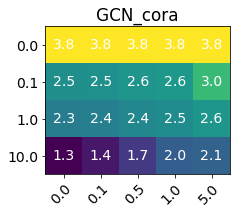

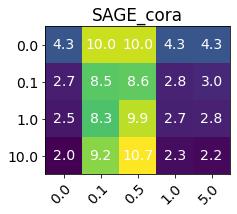

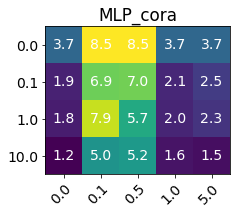

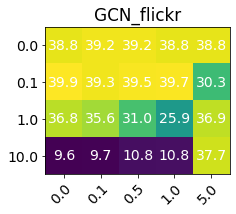

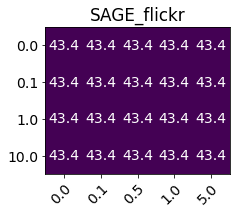

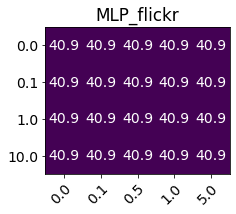

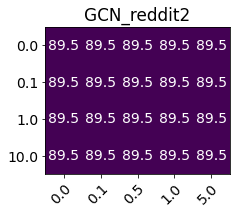

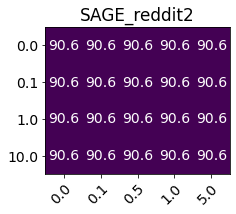

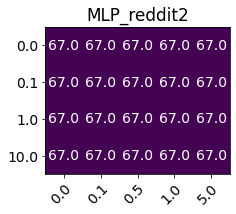

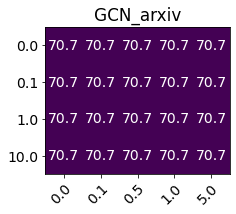

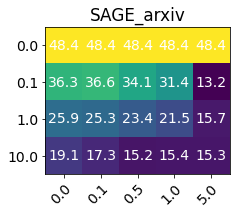

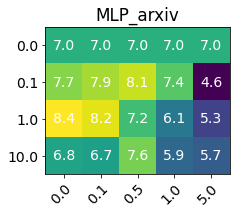

In [24]:
manner = 'Ada_GD_Diff'
hyper_Diffs = [0., 0.1, 1.0, 10.0]
gammas = [0., 0.1, 0.5, 1.0, 5.0]
summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        summary[dataset][model] = {}
        for hyper_Diff in hyper_Diffs:
            summary[dataset][model][hyper_Diff] = {}
            for gamma in gammas:
                file_name = f'{ROOT}/{dataset}/{manner}/{model}_{criterion}_eval_hyper_Diff={hyper_Diff}_gamma={gamma}.json'
                with open(file_name, 'r') as f:
                    summary[dataset][model][hyper_Diff][gamma] = json.load(f)
# print(summary)

for dataset in datasets:
    for model in models:
        plot_2hyper(summary, hyper_Diffs, gammas, model, dataset)